## 线性回归的梯度下降法实现

房价预测模型 W=a0+a1x1+a2x2...anxn  
∂J(a<sub>i</sub>)/∂a<sub>i</sub> = (-1/n)$\sum_1^n$(w<sub>i</sub>-h<sub>a</sub>(x<sub>i</sub>))x<sup>j</sup><sub>i</sub>

a<sub>i</sub> += α(-1/n)$\sum_{i=1}^{n}$(w<sub>i</sub>-h<sub>a</sub>(x<sub>i</sub>))x<sup>j</sup><sub>i</sub>
(梯度下降）

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
filepath = 'C:/Users/32673/Desktop/工作室作业/小组/week1/house_data.csv'
alpha = 0.0001  #步长
times_ = 10000  #次数

df = pd.read_csv(filepath, header=0)
df_test = df.sample(n=10, replace = False)
df = df.drop(df_test.index)

def init_data():
    """训练用"""
    w = df.MEDV
    x1 = df.LSTAT
    x2 = df.RM
    return w, x1, x2

def init_test_data():
    """测试用"""
    x1 = df_test.LSTAT
    x2 = df_test.RM
    w = df_test.MEDV
    return w, x1, x2

def init_matrix(x1, x2):
    """init matrix"""
    X = np.array([x1, x2]).T
    X = np.hstack([np.ones((X.shape[0],1)),X])
    return X
    
def train(X, w, a, alpha):
    """学习"""
    n = len(w)
    for _ in range(times_):
        hx = X @ a
        error = hx - w
        g = X.T @ error
        a = a - alpha * (1/n) * g
    return a

def figure(x1, x2, w1, w2):
    fig = plt.figure()
    f = fig.add_subplot(projection='3d')
    f.set_zlabel('w')
    f.set_ylabel('x2')
    f.set_xlabel('x1')
    f.scatter(x1, x2, w1)
    f.scatter(x1, x2, w2, color='r')
    plt.show()

In [67]:
w, x1, x2 = init_data()
X = init_matrix(x1, x2)
a = [0,0,0]

a = train(X, w, a, alpha)

print(a)

[ 0.65087598 -0.67185379  4.83731643]


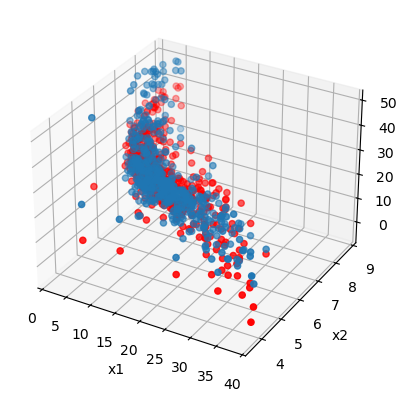

In [68]:
w_pred = X @ a


figure(x1, x2, w, w_pred)

## TEST

error =  0.017092848761745143
[[ 1.     5.33   6.546]
 [ 1.    17.09   6.092]
 [ 1.    29.53   4.926]
 [ 1.     6.75   6.31 ]
 [ 1.     9.42   6.727]
 [ 1.     8.23   6.453]
 [ 1.    26.82   5.403]
 [ 1.     7.2    6.426]
 [ 1.     6.59   6.24 ]
 [ 1.    15.7    6.006]]
[28.73496863 18.63782636  4.63965422 26.63932956 26.86264089 26.3367222
  8.76777794 26.89812406 26.40821402 19.15569392]


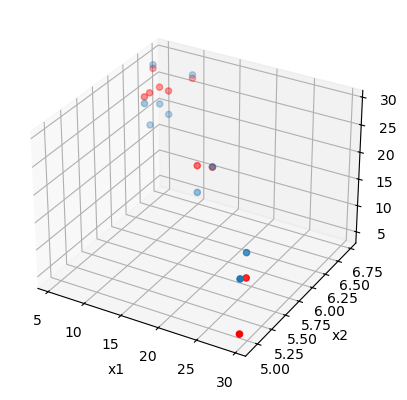

In [72]:
w_test, x1_test, x2_test = init_test_data()

X_test = init_matrix(x1_test, x2_test)


w_pred = X_test @ a
error = w_pred - w_test

print("error = ",np.sum(error)/np.sum(w_test))


print(X_test)
print(w_pred)

figure(x1_test, x2_test, w_test, w_pred)


可以通过去除奇异值或多组训练优化~~（问我为什么没有改那就是懒）~~